# Spam Detection using Ensemble Methods

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/spam mail.csv')
df.shape

(5572, 2)

In [4]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Category,Masseges
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Data Preprocessing 

In [10]:
print("Missing Values:")
print(df.isnull().sum())

print("\nClass Distribution:")
print(df['Category'].value_counts())
print(df['Category'].value_counts(normalize=True))

print("\nData Shape Before Cleaning:", df.shape)
df_clean = df.dropna()
print("Data Shape After Cleaning:", df_clean.shape)

Missing Values:
Category    0
Masseges    0
dtype: int64

Class Distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64
Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Data Shape Before Cleaning: (5572, 2)
Data Shape After Cleaning: (5572, 2)


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df_clean['Category'] = le.fit_transform(df_clean['Category'])

print("\nLabel Encoding:")
print(f"Classes: {le.classes_}")
print(f"Encoded: {le.transform(le.classes_)}")

tfidf = TfidfVectorizer(max_features=3000, stop_words='english', min_df=2, max_df=0.8)
X = tfidf.fit_transform(df_clean['Masseges'])
y = df_clean['Category']

print(f"\nFeature Extraction:")
print(f"TF-IDF Matrix Shape: {X.shape}")
print(f"Number of Features: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain-Test Split:")
print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")
print(f"Train Class Distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test Class Distribution: {pd.Series(y_test).value_counts().to_dict()}")


Label Encoding:
Classes: ['ham' 'spam']
Encoded: [0 1]

Feature Extraction:
TF-IDF Matrix Shape: (5572, 3000)
Number of Features: 3000

Train-Test Split:
Training Set: (4457, 3000)
Testing Set: (1115, 3000)
Train Class Distribution: {0: 3859, 1: 598}
Test Class Distribution: {0: 966, 1: 149}


## Training and Evaluation

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('svm', svm), ('nb', nb), ('rf', rf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print("ENSEMBLE MODEL - VOTING CLASSIFIER")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print("="*50)

ENSEMBLE MODEL - VOTING CLASSIFIER
Accuracy:  0.9830
Precision: 1.0000
Recall:    0.8725
F1-Score:  0.9319


In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('svm', svm), ('nb', nb), ('rf', rf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print("ENSEMBLE MODEL - VOTING CLASSIFIER")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print("="*50)

In [13]:
base_learners = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Naive Bayes': nb,
    'Random Forest': rf
}

results = {}
for name, model in base_learners.items():
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred_base),
        'Precision': precision_score(y_test, y_pred_base),
        'Recall': recall_score(y_test, y_pred_base),
        'F1-Score': f1_score(y_test, y_pred_base)
    }

results['Voting Ensemble'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

results_df = pd.DataFrame(results).T
print("\nMODEL COMPARISON")
print("="*60)
print(results_df.round(4))
print("="*60)


MODEL COMPARISON
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.9686     1.0000  0.7651    0.8669
SVM                    0.9821     0.9924  0.8725    0.9286
Naive Bayes            0.9767     0.9920  0.8322    0.9051
Random Forest          0.9767     1.0000  0.8255    0.9044
Voting Ensemble        0.9830     1.0000  0.8725    0.9319


## Plots and Analysis

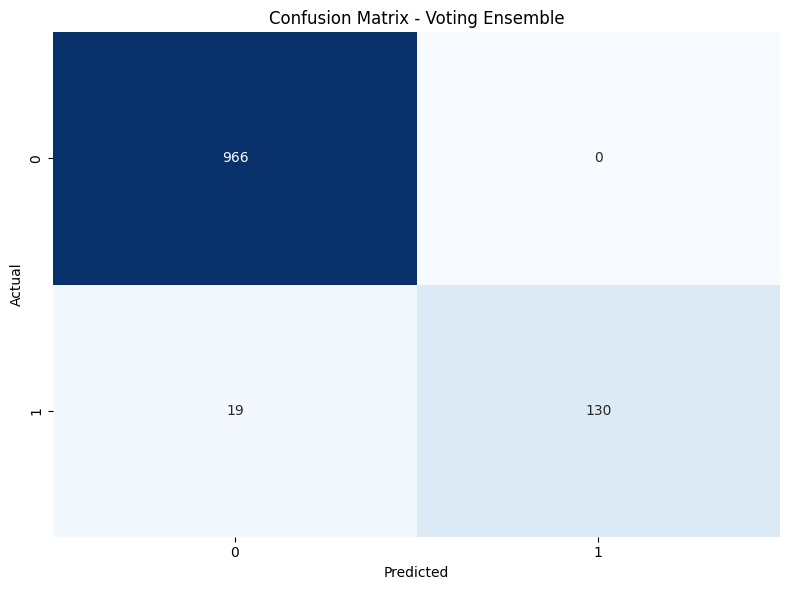

In [14]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Voting Ensemble')
plt.tight_layout()
plt.show()

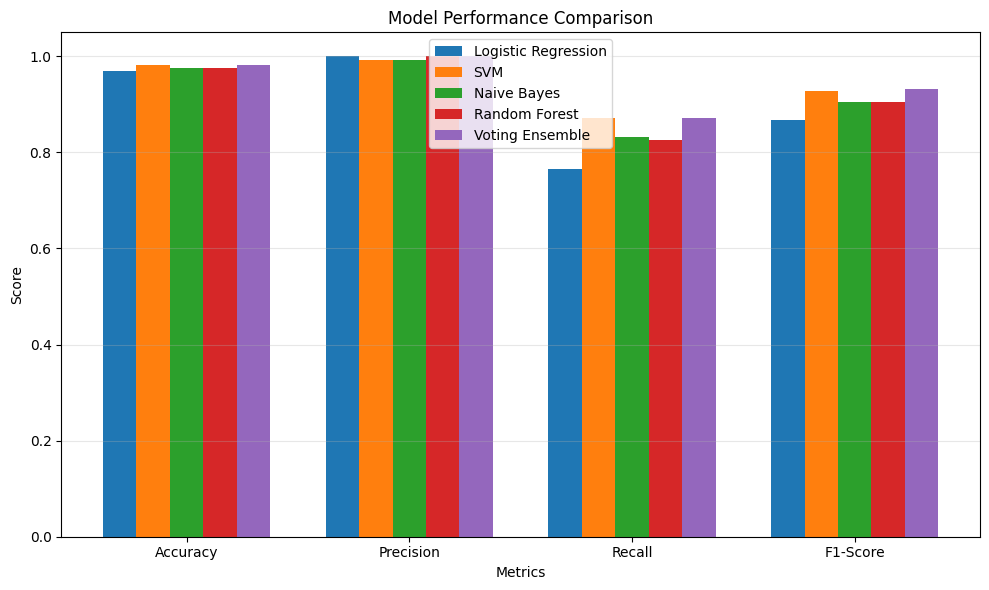

In [15]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.15

for i, (model, scores) in enumerate(results.items()):
    values = [scores[m] for m in metrics]
    ax.bar(x + i*width, values, width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

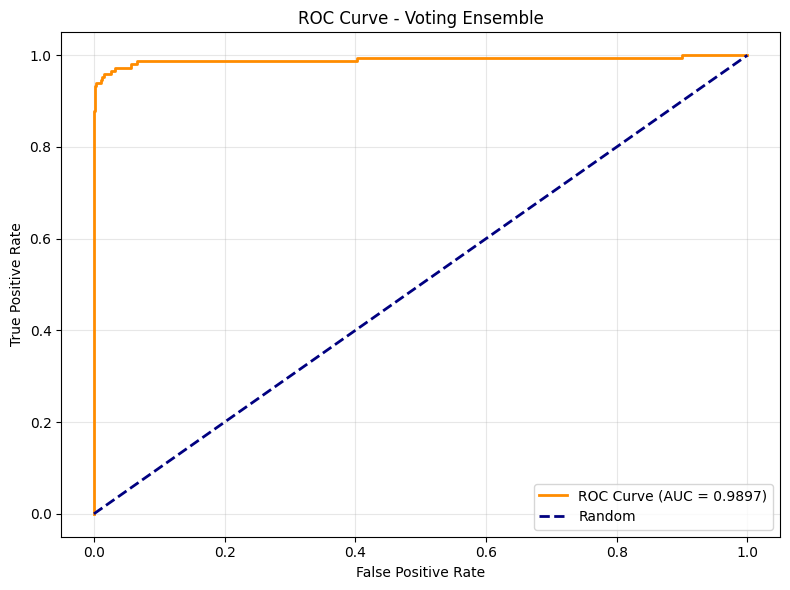

In [16]:
y_proba = voting_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Voting Ensemble')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
tn, fp, fn, tp = cm.ravel()

print("\nDETAILED METRICS")
print("="*50)
print(f"True Negatives:  {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives:  {tp}")
print(f"\nSpecificity: {tn/(tn+fp):.4f}")
print(f"Sensitivity: {tp/(tp+fn):.4f}")
print(f"AUC-ROC:     {roc_auc:.4f}")
print("="*50)


DETAILED METRICS
True Negatives:  966
False Positives: 0
False Negatives: 19
True Positives:  130

Specificity: 1.0000
Sensitivity: 0.8725
AUC-ROC:     0.9897


Thanks!